In [18]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:\\practice_data_set\\student1.csv")
df.head()

,name,gmat,gpa,exp,admitted,country
0,samir,780,4.0,3,1,Ind
1,kaushal,750,3.9,4,1,Ind
2,nandan,690,3.3,3,0,Ind
3,ankit,710,3.7,5,1,us
4,deepika,680,3.9,4,0,Ind


In [3]:
df.shape

(42, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      42 non-null     object 
 1   gmat      42 non-null     int64  
 2   gpa       42 non-null     float64
 3   exp       42 non-null     int64  
 4   admitted  42 non-null     int64  
 5   country   42 non-null     object 
dtypes: float64(1), int64(3), object(2)
memory usage: 2.1+ KB


In [5]:
df.isnull().sum()

name        0
gmat        0
gpa         0
exp         0
admitted    0
country     0
dtype: int64

In [6]:
df.describe()

,gmat,gpa,exp,admitted
count,42.000000,42.000000,42.000000,42.000000
mean,653.333333,3.123810,4.023810,0.500000
std,64.113720,0.629289,3.591916,0.506061
min,510.000000,1.700000,1.000000,0.000000
25%,602.500000,2.700000,2.000000,0.000000
50%,660.000000,3.300000,4.000000,0.500000
75%,690.000000,3.700000,5.000000,1.000000
max,780.000000,4.000000,24.000000,1.000000


In [7]:
df.drop(['name','country'],axis=1,inplace=True)

In [8]:
X = df.drop("admitted",axis=1)
X.head()

,gmat,gpa,exp
0,780,4.0,3
1,750,3.9,4
2,690,3.3,3
3,710,3.7,5
4,680,3.9,4


In [9]:
y = df.admitted
y.head()

0    1
1    1
2    0
3    1
4    0
Name: admitted, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [12]:
X_train.shape

(33, 3)

In [13]:
X_test.shape

(9, 3)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.6666666666666666

In [19]:
model.predict([[750,3.8,4]])

array([1], dtype=int64)

In [20]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [22]:
y_test[:10]

25    1
13    0
8     1
26    1
4     0
39    1
19    0
29    1
30    0
Name: admitted, dtype: int64

In [24]:
# to find knn values according to score
score = []
for i in range(2,11):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    accuracy = model.score(X_test,y_test)
    score.append(accuracy)

In [25]:
score

[0.7777777777777778,
 0.6666666666666666,
 0.7777777777777778,
 0.6666666666666666,
 0.5555555555555556,
 0.6666666666666666,
 0.8888888888888888,
 0.6666666666666666,
 0.7777777777777778]

In [26]:
import matplotlib.pyplot as plt

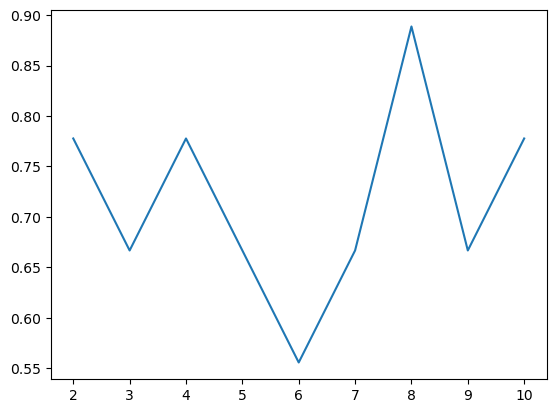

In [27]:
plt.plot(range(2,11),score)
plt.show()

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
cm = confusion_matrix(y_test,y_pred)

In [30]:
cm

array([[1, 3],
       [0, 5]], dtype=int64)

In [31]:
import seaborn as sns

<Axes: >

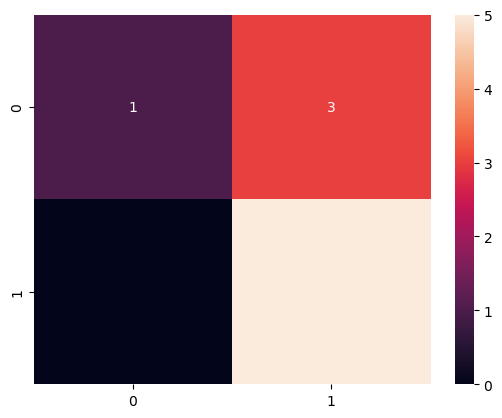

In [32]:
sns.heatmap(cm,annot=True)